# Step 1. __Import__ the necessary libraries


In [145]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called.


In [146]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(url, sep = '\t')

In [147]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# Step 4. How many products cost more than $10.00?

In [148]:
df.item_price.value_counts(dropna=False)

$8.75      730
$11.25     521
$9.25      398
$4.45      349
$8.49      311
          ... 
$15.00       1
$26.07       1
$5.07        1
$7.98        1
$22.20       1
Name: item_price, Length: 78, dtype: int64

In [149]:
df.item_price.dtype

dtype('O')

In [150]:
df.item_price = df.item_price.str.strip("$").astype("float")

In [151]:
df.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [152]:
df.query("item_price>10")["item_name"].nunique()

31

In [153]:
df.item_name[df.item_price>10].value_counts().count()

31

# print a data frame with only two columns item_name and item_price
# Step 5. What is the price of each item?

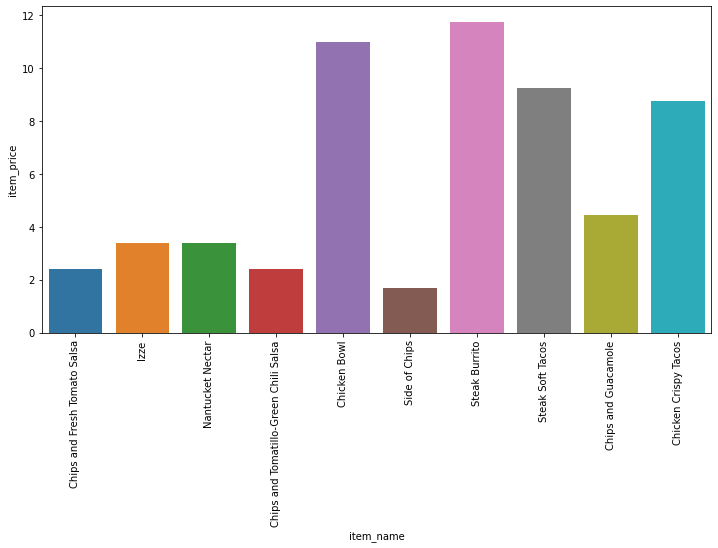

In [161]:
# delete the duplicates in item_name and quantity

df_filtered = df.drop_duplicates(['item_name','quantity'])

df[(df['item_name'] == 'Chicken Bowl') & (df['quantity'] == 1)]

# select only the products with quantity equals to 1

df_one_prod = df_filtered[df_filtered.quantity == 1]

#select only the item_name and item_price columns

price_per_item = df_one_prod[['item_name', 'item_price']]

#sort the values from the most to less expensive

price_per_item.sort_values(by = "item_price", ascending = False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data= price_per_item.head(10), x = "item_name", y="item_price" )
plt.xticks(rotation=90)
plt.show()

# Ex - GroupBy

# Step 1. Import the necessary libraries

In [133]:
import pandas as pd

# Step 2. Import the dataset from this address.

# Step 3. Assign it to a variable called drinks.

In [134]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv")

In [135]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


# Step 4. Which continent drinks more beer on average?

In [136]:
df_beer = df.groupby("continent")["beer_servings"].mean()

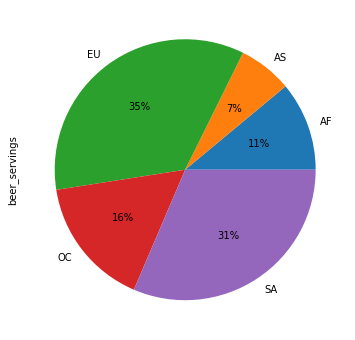

In [137]:
plt.figure(figsize=(12,6))
df_beer.plot(kind= "pie",autopct='%.0f%%');

In [138]:
df_beer.sort_values(ascending=False)

continent
EU    193.777778
SA    175.083333
OC     89.687500
AF     61.471698
AS     37.045455
Name: beer_servings, dtype: float64

# Step 5. For each continent print the statistics for wine consumption.

In [139]:
df_continent = df.groupby("continent")["wine_servings"].describe()

In [140]:
df_continent 

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


# Step 6. Print the mean alcohol consumption per continent for every column

In [141]:
df.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


# Step 7. Print the median alcohol consumption per continent for every column

In [142]:
df.groupby("continent").median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


# 8. Print the mean, min and max values for spirit consumption.

In [143]:
df.groupby("continent")["spirit_servings"].agg(["mean", "min","max"])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


In [144]:
df.groupby("continent")["spirit_servings"].describe()[["mean", "min","max"]]

,mean,min,max
continent,,,
AF,16.339623,0.0,152.0
AS,60.840909,0.0,326.0
EU,132.555556,0.0,373.0
OC,58.437500,0.0,254.0
SA,114.750000,25.0,302.0
